# Data Analysis

We have six datasets: 
1. Participant data
2. Participant task interaction data
3. Personality test of participants
4. Tasks
5. Post Study questionnaire data
6. Messages data

In [2]:
# Imports
import pandas as pd

## Pulling the data from Supabase

In [3]:
import csv
import requests

SUPABASE_URL = "https://vhuxlodxugpwodorwwzq.supabase.co"
SUPABASE_KEY = "sb_secret_iRWiJzUEwwbHNFA3A5LIUg_w_b9pmrh"

def export_table_to_csv(table_name: str, filename):
    """
    Export any Supabase table to a CSV file.
    
    Args:
        table_name (str): Name of the table to export.
        filename (str): Output CSV filename (defaults to <table_name>.csv).
    """
    if filename is None:
        filename = f"{table_name}.csv"

    url = f"{SUPABASE_URL}/rest/v1/{table_name}"
    headers = {
        "apikey": SUPABASE_KEY,
        "Authorization": f"Bearer {SUPABASE_KEY}",
        "Accept": "application/json"
    }

    # Fetch all rows
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        raise Exception(f"Error fetching {table_name}: {response.status_code} {response.text}")
    
    rows = response.json()
    if not rows:
        print(f"No data found in {table_name}.")
        return

    # Write to CSV
    keys = rows[0].keys()
    with open(filename, mode="w", newline="", encoding="utf-8") as f:
        writer = csv.DictWriter(f, fieldnames=keys)
        writer.writeheader()
        writer.writerows(rows)

    print(f"Exported {len(rows)} rows from '{table_name}' to {filename}")

# Example usage
export_table_to_csv("participant", 'participant.csv')      # saves to participant.csv
export_table_to_csv("task", "tasks.csv") # saves to tasks.csv
export_table_to_csv("participant_task_interaction", "participant_task_interaction.csv")
export_table_to_csv("message", "message.csv")
export_table_to_csv("personality_test", "personality_test.csv")
export_table_to_csv("post_study_questions", "post_study_questions.csv")

Exported 90 rows from 'participant' to participant.csv
Exported 11 rows from 'task' to tasks.csv
Exported 540 rows from 'participant_task_interaction' to participant_task_interaction.csv
Exported 1000 rows from 'message' to message.csv
Exported 72 rows from 'personality_test' to personality_test.csv
Exported 29 rows from 'post_study_questions' to post_study_questions.csv


## Participants Data Cleaning

In [70]:
participant = pd.read_csv('participant.csv')
participant = participant.drop(columns=['password'], axis=1)
participant.head()


,id,created_at,name,email,age,gender,education,occupation,nationality,frequency_usage,english_fluency,ai_usage,consent,familiarity
0,1,2025-08-11T16:39:58.335908+00:00,Shajia Mithani,shajia.mithani@gmail.com,28,female,university,social,pakistan,multiple-times,fluent-c1,"[{'label': 'Teaching', 'value': 'teaching'}]",True,"{'1': True, '2': True, '3': True, '4': False, ..."
1,2,2025-08-11T16:54:37.71803+00:00,Tauqeer Ahmed Iqbal Ahmed Shaikh,tauqeer.shaikh@stud.fra-uas.de,24,male,university,computing,india,constantly,fluent-c1,"[{'label': 'Work (e.g. writing, coding)', 'val...",True,"{'1': True, '2': True, '3': True, '4': True, '..."
2,3,2025-08-11T17:10:42.112849+00:00,Hamza Asaad,hamza.asaad@stud.fra-uas.de,26,male,university,computing,pakistan,always,fluent-c1,"[{'label': 'Work (e.g. writing, coding)', 'val...",True,"{'1': True, '2': False, '3': False, '4': False..."
3,4,2025-08-11T17:26:05.462118+00:00,rafia Basheer,rafia.ahamed-basheer@stud.fra-uas.de,33,female,university,engineering,india,often,intermediate-b2,"[{'label': 'Learning / Studying', 'value': 'le...",True,"{'1': True, '2': True, '3': True, '4': True, '..."
4,5,2025-08-11T18:52:21.661286+00:00,Adesh Shirke,adesh.shirke@stud.fra-uas.de,27,male,post-secondary,engineering,india,always,fluent-c1,"[{'label': 'Research / Information Gathering',...",True,"{'1': True, '2': False, '3': False, '4': False..."


In [71]:
print("total females:", participant.loc[participant['gender'] == 'female'].reset_index(drop=True).__len__())
print("total males:", participant.loc[participant['gender'] == 'male'].reset_index(drop=True).__len__())
print('Both includes duplicates')

total females: 42
total males: 48
Both includes duplicates


### Handling deduplication

In [72]:
participant['email'] = participant['email'].str.lower().str.strip()
participant['name'] = participant['name'].str.lower().str.strip()

print(participant["name"].value_counts()[participant["name"].value_counts() > 1].__len__())
print(participant["email"].value_counts()[participant["email"].value_counts() > 1].__len__())

12
13


As some participants attempted the study more than once, we will still consider their prompts so we will merge them after we have imported and cleaned all the other datasets.

## Participant Task Interaction

In [73]:
participant_task_interaction = pd.read_csv('participant_task_interaction.csv')
participant_task_interaction.head()


,id,started_at,ended_at,ai_tool,participant_id,task_id
0,1,2025-08-11T16:43:46.321746+00:00,2025-08-11T16:43:46.588334+00:00,GPT-4o,1,1
1,2,2025-08-11T16:47:04.536261+00:00,NaN,GPT-4o,1,2
2,4,2025-08-11T16:48:39.841189+00:00,NaN,GPT-4o,1,3
3,5,2025-08-11T16:49:07.215491+00:00,NaN,GPT-4o,1,3
4,3,2025-08-11T16:48:15.553518+00:00,2025-08-11T16:49:21.11072+00:00,GPT-4o,1,3


## Messages

In [74]:
message = pd.read_csv('message.csv')
message.tail()

,id,created_at,interaction_id,sender,content
995,991,2025-08-26T16:09:36.07+00:00,496,user,add more plants and make it more victorian
996,992,2025-08-26T16:09:52.876+00:00,496,ai,/static/images/image_20250826_161017_474168_5a...
997,993,2025-08-26T16:10:28.467+00:00,497,user,"this is too much greenery, remove the greenery..."
998,994,2025-08-26T16:10:45.706+00:00,497,ai,/static/images/image_20250826_161111_624337_88...
999,995,2025-08-26T16:12:06.952+00:00,498,user,I have 4 apartment members and I need a plan t...


In [75]:
task = pd.read_csv('tasks.csv')
task.head()

,id,description,task_type,category,title
0,1,Describe one of your favorite moments from you...,image,Image Generation,Visualize a memory from your last vacation.
1,2,You recently moved into a new room and are see...,image,Image Generation,Design your room
2,3,Start by telling the AI about your roommates (...,text,Brainstorming,You share an apartment and want help dividing ...
3,4,"Describe your friend to the AI — personality, ...",text,Brainstorming,Buy a thoughtful birthday gift for your best f...
4,5,"Share your fitness goals, dietary preferences,...",text,Planning,Build a weekly fitness and meal plan tailored ...


## Handling Duplication

Merging across the datasets.

In [76]:
import numpy as np

# Step 1: normalize email
participant["email_norm"] = participant["email"].str.strip().str.lower()

# Step 2: build dedupe key
participant["dedupe_key"] = np.where(
    participant["email_norm"].notna(),
    participant["email_norm"],
    participant["name"].str.strip().str.lower() + "_" +
    participant["age"].astype(str) + "_" +
    participant["nationality"].str.strip().str.lower()
)

# Step 3: sort and pick a canonical row for each dedupe_key
participants_sorted = participant.sort_values("created_at")
canonical = participants_sorted.drop_duplicates(subset=["dedupe_key"], keep="first")

# Step 4: map ALL old_ids to the canonical_id
id_map = {}
for key, group in participants_sorted.groupby("dedupe_key"):
    canonical_id = group.iloc[0]["id"]   # pick the first submission
    for pid in group["id"]:
        id_map[pid] = canonical_id

# Step 5: reassign interactions to canonical participant_id
participant_task_interaction["participant_id"] = participant_task_interaction["participant_id"].map(id_map)

# Step 6: now canonical is your deduplicated participant table
deduped = canonical.copy()

# Full dataset (deduped but not subsampled)
full_participants = deduped.copy()

# Step 7: balance genders
male_df = deduped[deduped["gender"].str.lower() == "male"]
female_df = deduped[deduped["gender"].str.lower() == "female"]

n_females = len(female_df)
balanced_male_df = male_df.sample(n=n_females, random_state=42)

subsampled_participants = pd.concat([balanced_male_df, female_df], ignore_index=True)
subsampled_participants = subsampled_participants.sample(frac=1, random_state=42).reset_index(drop=True)


print("Full dataset:")
print(full_participants["gender"].value_counts())

print("\nSubsampled dataset:")
print(subsampled_participants["gender"].value_counts())


Full dataset:
gender
male      35
female    14
Name: count, dtype: int64

Subsampled dataset:
gender
male      14
female    14
Name: count, dtype: int64


In [77]:
subsampled_participants.__len__()



28

# Analysis

Data restructuring

In [78]:
def build_grouped_conversations(participants_df):
    # Merge PTI with message
    merged_df = participant_task_interaction.merge(
        message,
        left_on="id",          
        right_on="interaction_id",  
        how="inner"
    )

    # Merge with task
    merged_df = merged_df.merge(
        task,
        left_on="task_id",
        right_on="id",
        how="inner",
        suffixes=("", "_task")
    )

    # Merge with participant (to bring gender + any other attributes)
    merged_df = merged_df.merge(
        participants_df,
        left_on="participant_id",
        right_on="id",
        how="inner",
        suffixes=("", "_participant")
    )

    # Sort for chronological conversations
    merged_df = merged_df.sort_values(by=["participant_id", "task_id", "created_at"])

    # Group conversations per participant/task, but now gender is also available
    grouped_conversations = (
        merged_df.groupby(["participant_id", "gender", "task_id"])
        .apply(lambda x: [
            {"sender": row["sender"], "content": row["content"], "created_at": row["created_at"]}
            for _, row in x.iterrows()
        ])
        .reset_index(name="conversation")
    )

    return grouped_conversations, merged_df

# grouped_conversations.to_csv('./data/grouped_conversations.csv', index=False)
grouped_full, merged_df_full = build_grouped_conversations(full_participants)
grouped_subsampled, merged_df_subsampled = build_grouped_conversations(subsampled_participants)


C:\Users\human\AppData\Local\Temp\ipykernel_103044\3951503968.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: [
C:\Users\human\AppData\Local\Temp\ipykernel_103044\3951503968.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: [


### N by gender

In [79]:
print("Full dataset:")
print(merged_df_full.groupby('gender').count()['content'])

print("\nSubsampled dataset:")
print(merged_df_subsampled.groupby('gender').count()['content'])

Full dataset:
gender
female    132
male      868
Name: content, dtype: int64

Subsampled dataset:
gender
female    132
male      336
Name: content, dtype: int64


# Dependent Variables

## Prompt Length

In [80]:
def prompt_length(conv):
    return [len(msg["content"].split()) for msg in conv if msg["sender"] == "user"][0]


In [81]:
grouped_subsampled["prompt_length"] = grouped_subsampled["conversation"].apply(prompt_length)
grouped_full["prompt_length"] = grouped_full["conversation"].apply(prompt_length)


prompt_lengths = grouped_subsampled[['gender', 'prompt_length']]

In [82]:
prompt_lengths.head()

,gender,prompt_length
0,female,21
1,female,35
2,female,9
3,female,15
4,female,7


In [83]:
prompt_lengths.groupby('gender').mean()

,prompt_length
gender,
female,37.470588
male,29.919355


## Vocabular Variety (TTR)

In [84]:
def ttr(conv):
    '''Distinct Words Ratio'''
    texts = [msg["content"] for msg in conv if msg["sender"] == "user"]
    words = " ".join(texts).split()
    return len(set(words)) / len(words) if words else 0


In [85]:
grouped_subsampled["ttr"] = grouped_subsampled["conversation"].apply(ttr)
grouped_full["ttr"] = grouped_full["conversation"].apply(ttr)


ttr = grouped_subsampled[['gender', 'ttr']]

In [86]:
ttr.head()

,gender,ttr
0,female,0.904762
1,female,0.914286
2,female,0.833333
3,female,1.000000
4,female,0.935484


In [87]:
ttr.groupby('gender').mean()

,ttr
gender,
female,0.790567
male,0.795662


## Emotion and Judgement Words

In [88]:

# Load NRC Emotion Lexicon
lexicon = pd.read_csv("NRC-Emotion-Lexicon-Wordlevel-v0.92.txt", 
                      names=["word", "emotion", "association"], 
                      sep="\t")

# Keep only associations where association == 1
lexicon = lexicon[lexicon["association"] == 1]

# Convert to dictionary: {word: [emotions]}
emotion_words = {}
for _, row in lexicon.iterrows():
    emotion_words.setdefault(row["word"], []).append(row["emotion"])

print(emotion_words)

def emotion_counts(conv):
    counts = {
        "anger": 0, "anticipation": 0, "disgust": 0, "fear": 0,
        "joy": 0, "negative": 0, "positive": 0, "sadness": 0,
        "surprise": 0, "trust": 0
    }
    for msg in conv:
        if msg["sender"] == "user":   # or "participant" depending on your mapping
            for w in msg["content"].lower().split():
                if w in emotion_words:
                    for emo in emotion_words[w]:
                        counts[emo] += 1
    return counts



{'abacus': ['trust'], 'abandon': ['fear', 'negative', 'sadness'], 'abandoned': ['anger', 'fear', 'negative', 'sadness'], 'abandonment': ['anger', 'fear', 'negative', 'sadness', 'surprise'], 'abba': ['positive'], 'abbot': ['trust'], 'abduction': ['fear', 'negative', 'sadness', 'surprise'], 'aberrant': ['negative'], 'aberration': ['disgust', 'negative'], 'abhor': ['anger', 'disgust', 'fear', 'negative'], 'abhorrent': ['anger', 'disgust', 'fear', 'negative'], 'ability': ['positive'], 'abject': ['disgust', 'negative'], 'abnormal': ['disgust', 'negative'], 'abolish': ['anger', 'negative'], 'abolition': ['negative'], 'abominable': ['disgust', 'fear', 'negative'], 'abomination': ['anger', 'disgust', 'fear', 'negative'], 'abort': ['negative'], 'abortion': ['disgust', 'fear', 'negative', 'sadness'], 'abortive': ['negative', 'sadness'], 'abovementioned': ['positive'], 'abrasion': ['negative'], 'abrogate': ['negative'], 'abrupt': ['surprise'], 'abscess': ['negative', 'sadness'], 'absence': ['fear

In [89]:
grouped_subsampled["emotion_counts"] = grouped_subsampled["conversation"].apply(emotion_counts)
grouped_full["emotion_counts"] = grouped_full["conversation"].apply(emotion_counts)


emotion_counts = grouped_subsampled[['gender', 'emotion_counts']]

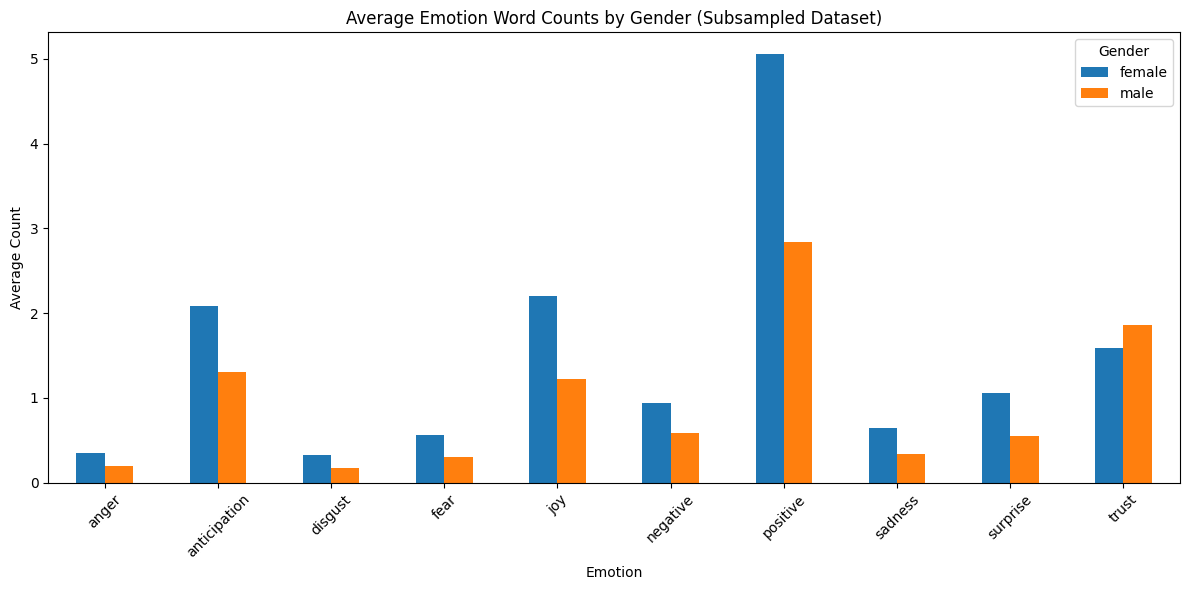

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

emotions_df = pd.json_normalize(emotion_counts['emotion_counts'])

# Merge with gender
df_expanded = pd.concat([emotion_counts['gender'], emotions_df], axis=1)

# Compute mean emotion counts by gender
mean_emotions = df_expanded.groupby("gender").mean()

# Plot
mean_emotions.T.plot(kind="bar", figsize=(12,6))
plt.title("Average Emotion Word Counts by Gender (Subsampled Dataset)")
plt.ylabel("Average Count")
plt.xlabel("Emotion")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

## Pronoun Usage

In [91]:
pronouns = {
    "first": {"i","me","my","we","us","our"},
    "second": {"you","your","yours"},
    "third": {"he","she","they","it","them","his","her","their"}
}

def pronoun_usage(conv):
    counts = {"first": 0, "second": 0, "third": 0}
    total = 0
    for msg in conv:
        if msg["sender"] == "user":
            words = msg["content"].lower().split()
            total += len(words)
            for w in words:
                for p in pronouns:
                    if w in pronouns[p]:
                        counts[p] += 1
    return {k: v/total if total else 0 for k,v in counts.items()}


In [92]:
grouped_subsampled["pronoun_usage"] = grouped_subsampled["conversation"].apply(pronoun_usage)
grouped_full["pronoun_usage"] = grouped_full["conversation"].apply(pronoun_usage)

pronoun_usage = grouped_subsampled[['gender', 'pronoun_usage']]

In [93]:
pronoun_usage.head()

,gender,pronoun_usage
0,female,"{'first': 0.0, 'second': 0.0, 'third': 0.04761..."
1,female,"{'first': 0.0, 'second': 0.0, 'third': 0.0}"
2,female,"{'first': 0.16666666666666666, 'second': 0.0, ..."
3,female,"{'first': 0.13333333333333333, 'second': 0.0, ..."
4,female,"{'first': 0.0967741935483871, 'second': 0.0, '..."


In [94]:
# expand the dicts in pronoun_usage into columns
expanded = pd.json_normalize(pronoun_usage['pronoun_usage'])

# join gender with expanded values
df_expanded = pd.concat([pronoun_usage['gender'], expanded], axis=1)

df_expanded.groupby('gender')[['first', 'second', 'third']].mean()

,first,second,third
gender,,,
female,0.076257,0.002863,0.026075
male,0.052926,0.005735,0.020633


## Sentence Length

In [95]:
import nltk
# Only need to do this once; run separately, not inside main loop
nltk.download("punkt")
nltk.download("punkt_tab")  # sometimes required in new nltk versions

def avg_sentence_length(conv):
    lengths = []
    for msg in conv:
        if msg["sender"] == "user":
            sentences = nltk.sent_tokenize(msg["content"])
            for s in sentences:
                lengths.append(len(s.split()))
    return sum(lengths)/len(lengths) if lengths else 0


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\human\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\human\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [96]:
grouped_subsampled["sentence_length"] = grouped_subsampled["conversation"].apply(avg_sentence_length)
grouped_full["sentence_length"] = grouped_full["conversation"].apply(avg_sentence_length)

sentence_length = grouped_subsampled[['gender', 'sentence_length']]

In [97]:
sentence_length.head()

,gender,sentence_length
0,female,21.000000
1,female,7.000000
2,female,8.000000
3,female,7.500000
4,female,4.428571


In [98]:
sentence_length.groupby("gender").mean().reset_index()

,gender,sentence_length
0,female,10.745462
1,male,14.725654


## Sentence Count

In [99]:
def sentence_count(conv):
    return sum(len(nltk.sent_tokenize(msg["content"])) for msg in conv if msg["sender"]=="user")


In [100]:
grouped_subsampled["sentence_count"] = grouped_subsampled["conversation"].apply(sentence_count)
grouped_full["sentence_count"] = grouped_full["conversation"].apply(sentence_count)

sentence_counts = grouped_subsampled[['gender', 'sentence_count']]
sentence_counts.head()

,gender,sentence_count
0,female,1
1,female,5
2,female,3
3,female,2
4,female,7


In [101]:
sentence_counts.groupby("gender").mean().reset_index()

,gender,sentence_count
0,female,6.000000
1,male,3.951613


## Phatic Expressions

In [102]:
phatic = {"hi","hello","thanks","thank you","bye"}

def contains_phatic(conv):
    return any(any(word in msg["content"].lower() for word in phatic) 
               for msg in conv if msg["sender"]=="user")


In [103]:
grouped_subsampled["phatic_expressions"] = grouped_subsampled["conversation"].apply(contains_phatic)
grouped_full["phatic_expressions"] = grouped_full["conversation"].apply(contains_phatic)

phatic_expressions = grouped_subsampled[['gender', 'phatic_expressions']]
phatic_expressions.head()

,gender,phatic_expressions
0,female,True
1,female,True
2,female,True
3,female,False
4,female,True


In [104]:
phatic_expressions.groupby("gender").mean().reset_index()

,gender,phatic_expressions
0,female,0.529412
1,male,0.451613


## Opinions (Subjectivity)

In [105]:
from textblob import TextBlob

def opinion_score(conv):
    texts = " ".join(msg["content"] for msg in conv if msg["sender"]=="user")
    return TextBlob(texts).sentiment.subjectivity if texts else 0


In [106]:
grouped_subsampled["opinion_score"] = grouped_subsampled["conversation"].apply(opinion_score)
grouped_full["opinion_score"] = grouped_full["conversation"].apply(opinion_score)

opinion_scores = grouped_subsampled[['gender', 'opinion_score']]
opinion_scores.head()

,gender,opinion_score
0,female,0.390000
1,female,0.241667
2,female,0.687500
3,female,1.000000
4,female,0.525983


In [107]:
opinion_scores.groupby("gender").mean().reset_index()

,gender,opinion_score
0,female,0.406108
1,male,0.389933


## Sentiment Score

In [108]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def sentiment(conv):
    texts = " ".join(msg["content"] for msg in conv if msg["sender"]=="user")
    return analyzer.polarity_scores(texts)["compound"] if texts else 0


In [109]:
grouped_subsampled["sentiment"] = grouped_subsampled["conversation"].apply(sentiment)
grouped_full["sentiment"] = grouped_full["conversation"].apply(sentiment)

sentiment_scores = grouped_subsampled[['gender', 'sentiment']]
sentiment_scores.head()

,gender,sentiment
0,female,-0.3384
1,female,0.3612
2,female,0.0772
3,female,0.8225
4,female,0.6397


In [110]:
sentiment_scores.groupby("gender").mean().reset_index()

,gender,sentiment
0,female,0.541059
1,male,0.429366


## Iteration Count

In [111]:
def iteration_count(conv):
    return sum(1 for msg in conv if msg["sender"]=="user")


In [112]:
grouped_subsampled["iteration_count"] = grouped_subsampled["conversation"].apply(iteration_count)
grouped_full["iteration_count"] = grouped_full["conversation"].apply(iteration_count)

iteration_counts = grouped_subsampled[['gender', 'iteration_count']]
iteration_counts.head() 

,gender,iteration_count
0,female,1
1,female,1
2,female,3
3,female,1
4,female,2


In [113]:
iteration_counts.groupby("gender").mean().reset_index()

,gender,iteration_count
0,female,1.970588
1,male,2.709677


# Hypotheses

## Hypothesis a:
H1a. Female users are expected to use a higher frequency of emotion-laden vocabulary (e.g., emotion words, tentative expressions, and uncertain verbs), along with greater pronoun usage and phatic expressions, reflecting a more interpersonally-oriented and emotionally expressive style.

H0a. There will be no significant difference between prompts submitted by male and female users in terms of their lexical, syntactic, pragmatic, or interactional linguistic features.

### DVs to consider:
1. Vocabulary variety (TTR) 
2. Emotion and Judgement Words using NRC Emotion Lexicon file
3. Pronoun Usage
4. Phatic expressions
5. Opinions subjectivity using textblob
6. Sentiment score using SentimentIntensityAnalyzer

Since this is a group difference test, we compare distribution of DVs between male and female.
1. If DV is normal in both groups (and variances are homogeneous) → use t-test (parametric).
2. If DV is not normal in at least one group → use Mann–Whitney U test (nonparametric alternative to independent t-test).

In [114]:
# grouped_conversations['ttr'] = ttr['ttr']
# grouped_conversations['emotion_counts'] = emotion_counts['emotion_counts']
# grouped_conversations['pronoun_usage'] = pronoun_usage['pronoun_usage']
# grouped_conversations['phatic_expressions'] = phatic_expressions['phatic_expressions']
# grouped_conversations['opinion_score'] = opinion_scores['opinion_score']
# grouped_conversations['sentiment'] = sentiment_scores['sentiment']
# grouped_conversations.head()




###  Normality Test

We use the **Shapiro–Wilk test** to assess whether each dependent variable (DV) is normally distributed within each gender group. The decision rule is based on **α = 0.05**:

* If **p > 0.05** → data do not significantly deviate from normality (treated as normal).
* If **p ≤ 0.05** → data deviate significantly from normality (non-normal).
* If one group is non-normal, the DV is treated as **non-normal overall**.

#### Full Dataset Normality Test

In [115]:
import pandas as pd
from scipy.stats import shapiro

# assume df is already loaded

# Expand dict columns into multiple columns
emotion_df = pd.json_normalize(grouped_full['emotion_counts'])
pronoun_df = pd.json_normalize(grouped_full['pronoun_usage'])

# Rename columns with prefixes
emotion_df = emotion_df.add_prefix('emo_')
pronoun_df = pronoun_df.add_prefix('pron_')

# Concatenate back to df
grouped_full = pd.concat([grouped_full.drop(['emotion_counts', 'pronoun_usage'], axis=1),
                emotion_df, pronoun_df], axis=1)

# Now your DVs are numeric columns:
dvs = ['ttr', 'emo_anger', 'emo_anticipation', 'emo_disgust', 
       'emo_fear', 'emo_joy', 'emo_sadness', 'emo_surprise', 
       'emo_trust',
       'pron_first', 'pron_second', 'pron_third',
       'opinion_score', 'sentiment']

# Run Shapiro-Wilk per DV per gender
results = {}

for dv in dvs:
    results[dv] = {}
    for group in grouped_full['gender'].unique():
        data = grouped_full[grouped_full['gender'] == group][dv].dropna()
        if len(data) >= 3:  # Shapiro requires at least 3 samples
            stat, p = shapiro(data)
            results[dv][group] = {"W": stat, "p-value": p}
        else:
            results[dv][group] = {"W": None, "p-value": None}

# Print results
for dv, groups in results.items():
    print(f"\nDV: {dv}")
    for group, res in groups.items():
        print(f"  {group}: W={res['W']}, p={res['p-value']}")



DV: ttr
  female: W=0.8622600174065266, p=0.0005326206935005489
  male: W=0.9155596169507758, p=1.154481180830717e-09

DV: emo_anger
  female: W=0.6055549703353338, p=2.3141273630651455e-08
  male: W=0.5348959921345863, p=1.8338918671918628e-23

DV: emo_anticipation
  female: W=0.6447635806960221, p=7.73518854973605e-08
  male: W=0.7131350271850637, p=7.011491750110093e-19

DV: emo_disgust
  female: W=0.5563438595956915, p=5.648262052068159e-09
  male: W=0.4519604196667094, p=3.85278000468163e-25

DV: emo_fear
  female: W=0.5302480048604206, p=2.7861418230540727e-09
  male: W=0.5167231309495213, p=7.534085212492816e-24

DV: emo_joy
  female: W=0.7071914729217125, p=6.357477781020931e-07
  male: W=0.7403180147354483, p=5.290210200374581e-18

DV: emo_sadness
  female: W=0.5641701004680354, p=7.018757893768573e-09
  male: W=0.5819666049392614, p=2.0948431901826243e-22

DV: emo_surprise
  female: W=0.5320942352643985, p=2.92645518267203e-09
  male: W=0.5932300722236161, p=3.87021266881071

#### Subsampled Dataset Normality Test

In [116]:
# assume df is already loaded

# Expand dict columns into multiple columns
emotion_df = pd.json_normalize(grouped_subsampled['emotion_counts'])
pronoun_df = pd.json_normalize(grouped_subsampled['pronoun_usage'])

# Rename columns with prefixes
emotion_df = emotion_df.add_prefix('emo_')
pronoun_df = pronoun_df.add_prefix('pron_')

# Concatenate back to df
grouped_subsampled = pd.concat([grouped_subsampled.drop(['emotion_counts', 'pronoun_usage'], axis=1),
                emotion_df, pronoun_df], axis=1)

# Run Shapiro-Wilk per DV per gender
results = {}

for dv in dvs:
    results[dv] = {}
    for group in grouped_subsampled['gender'].unique():
        data = grouped_subsampled[grouped_subsampled['gender'] == group][dv].dropna()
        if len(data) >= 3:  # Shapiro requires at least 3 samples
            stat, p = shapiro(data)
            results[dv][group] = {"W": stat, "p-value": p}
        else:
            results[dv][group] = {"W": None, "p-value": None}

# Print results
for dv, groups in results.items():
    print(f"\nDV: {dv}")
    for group, res in groups.items():
        print(f"  {group}: W={res['W']}, p={res['p-value']}")



DV: ttr
  female: W=0.8622600174065266, p=0.0005326206935005489
  male: W=0.9531201148738558, p=0.018906751247403975

DV: emo_anger
  female: W=0.6055549703353338, p=2.3141273630651455e-08
  male: W=0.35132195245034525, p=4.567023847126967e-15

DV: emo_anticipation
  female: W=0.6447635806960221, p=7.73518854973605e-08
  male: W=0.7682612919112108, p=1.6206002687589993e-08

DV: emo_disgust
  female: W=0.5563438595956915, p=5.648262052068159e-09
  male: W=0.4315228973429178, p=4.141096503170658e-14

DV: emo_fear
  female: W=0.5302480048604206, p=2.7861418230540727e-09
  male: W=0.5047441005019064, p=3.80550219153732e-13

DV: emo_joy
  female: W=0.7071914729217125, p=6.357477781020931e-07
  male: W=0.7526412522445458, p=7.192244152820986e-09

DV: emo_sadness
  female: W=0.5641701004680354, p=7.018757893768573e-09
  male: W=0.5771932850265094, p=4.352666674750012e-12

DV: emo_surprise
  female: W=0.5320942352643985, p=2.92645518267203e-09
  male: W=0.6436949779984009, p=5.34450007355028e

### Hypothesis A – Normality Results

#### Full Dataset

* **TTR (lexical diversity):** Females deviate significantly (p = 0.0005 < 0.05), and males also deviate (p < 0.001 < 0.05). → **Non-normal**.
* **Emotion words (anger, anticipation, disgust, fear, joy, sadness, surprise, trust):** All categories deviate significantly (p < 0.001 < 0.05 for both genders). → **Non-normal**.
* **Pronouns (first, second, third):** All pronoun types deviate significantly (p < 0.001 < 0.05 for both genders). → **Non-normal**.
* **Opinion score:** Females approximate normality (p = 0.132 > 0.05), but males deviate significantly (p < 0.001 < 0.05). → **Non-normal overall**.
* **Sentiment score:** Both groups deviate significantly (p < 0.001 < 0.05). → **Non-normal**.

**Conclusion (full dataset):** All dependent variables are treated as **non-normal overall**, requiring **Mann–Whitney U tests**.

---

#### Subsampled Dataset

* **TTR (lexical diversity):** Females deviate significantly (p = 0.0005 < 0.05), males approximate normality (p = 0.019 < 0.05 but close). Since one group fails → **Non-normal overall**.
* **Emotion words (anger, anticipation, disgust, fear, joy, sadness, surprise, trust):** All categories deviate significantly (p < 0.001 < 0.05 for both genders). → **Non-normal**.
* **Pronouns (first, second, third):** All pronoun types deviate significantly (p < 0.001 < 0.05 for both genders). → **Non-normal**.
* **Opinion score:** Females approximate normality (p = 0.132 > 0.05), but males deviate (p = 0.027 < 0.05). → **Non-normal overall**.
* **Sentiment score:** Both groups deviate significantly (p < 0.001 < 0.05). → **Non-normal**.

**Conclusion (subsampled dataset):** As in the full dataset, **all dependent variables are treated as non-normal overall**.

### Mann-Whitney U test for Full Dataset

In [117]:
from scipy.stats import mannwhitneyu

def mann_whitney_test(dv, grouped_df):
    print(f"\n=== {dv} ===")
    
    male_vals = grouped_df[grouped_df["gender"] == "male"][dv].dropna()
    female_vals = grouped_df[grouped_df["gender"] == "female"][dv].dropna()
    
    # Run Mann–Whitney U test
    u_stat, p_val = mannwhitneyu(male_vals, female_vals, alternative="two-sided")
    
    # Rank-biserial correlation (effect size)
    n1, n2 = len(male_vals), len(female_vals)
    rbc = 1 - (2 * u_stat) / (n1 * n2)   # formula for rank-biserial correlation
    
    print(f"U statistic = {u_stat}")
    print(f"p-value = {p_val:.6f}")
    print(f"Effect size (Rank-Biserial r) = {rbc:.3f}")
    print(f"Median (Male) = {male_vals.median():.2f}, Median (Female) = {female_vals.median():.2f}")
    print(f"Mean (Male) = {male_vals.mean():.2f}, Mean (Female) = {female_vals.mean():.2f}")


mann_whitney_dvs = ['ttr', 'emo_anger', 'emo_anticipation', 'emo_disgust', 
       'emo_fear', 'emo_joy', 'emo_sadness', 'emo_surprise', 
       'emo_trust',
       'pron_first', 'pron_second', 'pron_third',
       'opinion_score', 'sentiment']

for dv in mann_whitney_dvs:
    mann_whitney_test(dv, grouped_full)



=== ttr ===
U statistic = 4444.0
p-value = 0.032294
Effect size (Rank-Biserial r) = -0.227
Median (Male) = 0.85, Median (Female) = 0.80
Mean (Male) = 0.85, Mean (Female) = 0.79

=== emo_anger ===
U statistic = 3236.0
p-value = 0.185755
Effect size (Rank-Biserial r) = 0.106
Median (Male) = 0.00, Median (Female) = 0.00
Mean (Male) = 0.29, Mean (Female) = 0.35

=== emo_anticipation ===
U statistic = 3061.0
p-value = 0.122858
Effect size (Rank-Biserial r) = 0.155
Median (Male) = 1.00, Median (Female) = 1.00
Mean (Male) = 1.20, Mean (Female) = 2.09

=== emo_disgust ===
U statistic = 3350.0
p-value = 0.292808
Effect size (Rank-Biserial r) = 0.075
Median (Male) = 0.00, Median (Female) = 0.00
Mean (Male) = 0.20, Mean (Female) = 0.32

=== emo_fear ===
U statistic = 3214.0
p-value = 0.148094
Effect size (Rank-Biserial r) = 0.112
Median (Male) = 0.00, Median (Female) = 0.00
Mean (Male) = 0.32, Mean (Female) = 0.56

=== emo_joy ===
U statistic = 3235.0
p-value = 0.294859
Effect size (Rank-Biseria

### Mann-Whitney U test for Subsampled Dataset

In [118]:
for dv in mann_whitney_dvs:
    mann_whitney_test(dv, grouped_subsampled)



=== ttr ===
U statistic = 1044.5
p-value = 0.944958
Effect size (Rank-Biserial r) = 0.009
Median (Male) = 0.81, Median (Female) = 0.80
Mean (Male) = 0.80, Mean (Female) = 0.79

=== emo_anger ===
U statistic = 830.0
p-value = 0.015184
Effect size (Rank-Biserial r) = 0.213
Median (Male) = 0.00, Median (Female) = 0.00
Mean (Male) = 0.19, Mean (Female) = 0.35

=== emo_anticipation ===
U statistic = 937.5
p-value = 0.350948
Effect size (Rank-Biserial r) = 0.111
Median (Male) = 1.00, Median (Female) = 1.00
Mean (Male) = 1.31, Mean (Female) = 2.09

=== emo_disgust ===
U statistic = 953.5
p-value = 0.248499
Effect size (Rank-Biserial r) = 0.095
Median (Male) = 0.00, Median (Female) = 0.00
Mean (Male) = 0.18, Mean (Female) = 0.32

=== emo_fear ===
U statistic = 924.5
p-value = 0.185576
Effect size (Rank-Biserial r) = 0.123
Median (Male) = 0.00, Median (Female) = 0.00
Mean (Male) = 0.31, Mean (Female) = 0.56

=== emo_joy ===
U statistic = 951.0
p-value = 0.411087
Effect size (Rank-Biserial r) =

### Hypothesis A – Results

#### Full Dataset

* **Vocabulary diversity (TTR):** Significant difference between genders (U = 4444.0, p = .032, r = –.227). Males show higher lexical diversity (Median = 0.85) compared to females (Median = 0.80).
* **Third-person pronouns:** Significant difference (U = 2602.5, p = .003, r = .281). Females use more third-person pronouns (Median = 0.02) than males (Median = 0.00).
* **Other variables** (emotion word categories, first- and second-person pronouns, opinion score, sentiment) do not differ significantly.

#### Subsampled Dataset

* **Anger-related words (emo\_anger):** Females use significantly more anger-related words (U = 830.0, p = .015, r = .213).
* **All other variables** (TTR, other emotion words, pronouns, opinion score, sentiment) show no significant gender differences.

#### Conclusion

* **Full dataset:** Significant differences are observed in TTR (higher for males) and third-person pronouns (higher for females).
* **Subsampled dataset:** Only anger-related word use differs significantly (higher for females).
* Hypothesis A is **partially supported**, but the exact effects depend on whether the full or subsampled dataset is analyzed.


## Hypothesis B:
H1b: Male prompts may contain fewer and shorter sentences, indicating a more direct approach.

H0b: There will be no significant gender-based differences in sentence structure.

### Dependent Variables
For Hypothesis B, the relevant dependent variables are measures of sentence structure:
- **Sentence Count**: the number of sentences per prompt.  
- **Average Sentence Length**: the average number of words per sentence.

#### Full Dataset Normality Test

In [119]:
# Define DVs for Hypothesis B (sentence structure measures)
sentence_dvs = ['sentence_count', 'sentence_length']

# Dictionary to store results
normality_results = {}

# Test normality for each DV by gender
for dv in sentence_dvs:
    print(f"\nDV: {dv}")
    print("-" * 40)
    
    normality_results[dv] = {}
    
    for gender in sorted(grouped_full['gender'].unique()):
        # Extract data for this gender group
        data = grouped_full[grouped_full['gender'] == gender][dv].dropna()
        
        if len(data) >= 3:  # Shapiro-Wilk requires minimum 3 observations
            stat, p_value = shapiro(data)
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": stat, 
                "p_value": p_value,
                "is_normal": p_value > 0.05
            }
            
            print(f"{gender.title():>8}: W = {stat:.4f}, p = {p_value:.6f} (n={len(data)})")
            
        else:
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": None, 
                "p_value": None,
                "is_normal": None
            }
            print(f"{gender.title():>8}: Insufficient data (n={len(data)})")


DV: sentence_count
----------------------------------------
  Female: W = 0.7352, p = 0.000002 (n=34)
    Male: W = 0.7954, p = 0.000000 (n=213)

DV: sentence_length
----------------------------------------
  Female: W = 0.9332, p = 0.038736 (n=34)
    Male: W = 0.7092, p = 0.000000 (n=213)


#### Subsampled Dataset Normality Test

In [120]:
# Dictionary to store results
normality_results = {}

# Test normality for each DV by gender
for dv in sentence_dvs:
    print(f"\nDV: {dv}")
    print("-" * 40)
    
    normality_results[dv] = {}
    
    for gender in sorted(grouped_subsampled['gender'].unique()):
        # Extract data for this gender group
        data = grouped_subsampled[grouped_subsampled['gender'] == gender][dv].dropna()
        
        if len(data) >= 3:  # Shapiro-Wilk requires minimum 3 observations
            stat, p_value = shapiro(data)
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": stat, 
                "p_value": p_value,
                "is_normal": p_value > 0.05
            }
            
            print(f"{gender.title():>8}: W = {stat:.4f}, p = {p_value:.6f} (n={len(data)})")
            
        else:
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": None, 
                "p_value": None,
                "is_normal": None
            }
            print(f"{gender.title():>8}: Insufficient data (n={len(data)})")


DV: sentence_count
----------------------------------------
  Female: W = 0.7352, p = 0.000002 (n=34)
    Male: W = 0.8750, p = 0.000014 (n=62)

DV: sentence_length
----------------------------------------
  Female: W = 0.9332, p = 0.038736 (n=34)
    Male: W = 0.8060, p = 0.000000 (n=62)


### Hypothesis B – Normality Results

#### Full Dataset

* **Sentence count:** Females (p < 0.001 < 0.05) and males (p < 0.001 < 0.05) both deviate significantly. → **Non-normal**.
* **Sentence length:** Females deviate (p = 0.039 < 0.05), males strongly deviate (p < 0.001 < 0.05). → **Non-normal**.

**Conclusion (full dataset):** Both sentence count and sentence length are **non-normal**.

---

#### Subsampled Dataset

* **Sentence count:** Females (p < 0.001 < 0.05) and males (p < 0.001 < 0.05) both deviate significantly. → **Non-normal**.
* **Sentence length:** Females approximate normality (p = 0.039 \~ borderline < 0.05), males deviate strongly (p < 0.001 < 0.05). Since one group fails → **Non-normal overall**.

**Conclusion (subsampled dataset):** Both sentence count and sentence length are **non-normal**.

### Mann-Whitney U test for Full Dataset

In [121]:
# Run tests for Hypothesis B
mann_whitney_test("sentence_count", grouped_full)
mann_whitney_test("sentence_length", grouped_full)


=== sentence_count ===
U statistic = 2438.0
p-value = 0.001724
Effect size (Rank-Biserial r) = 0.327
Median (Male) = 2.00, Median (Female) = 5.00
Mean (Male) = 3.34, Mean (Female) = 6.00

=== sentence_length ===
U statistic = 4507.0
p-value = 0.022061
Effect size (Rank-Biserial r) = -0.245
Median (Male) = 12.20, Median (Female) = 10.07
Mean (Male) = 15.82, Mean (Female) = 10.75


### Mann-Whitney U test for Subsampled Dataset

In [122]:
# Run tests for Hypothesis B
mann_whitney_test("sentence_count", grouped_subsampled)
mann_whitney_test("sentence_length", grouped_subsampled)


=== sentence_count ===
U statistic = 853.0
p-value = 0.121007
Effect size (Rank-Biserial r) = 0.191
Median (Male) = 3.00, Median (Female) = 5.00
Mean (Male) = 3.95, Mean (Female) = 6.00

=== sentence_length ===
U statistic = 1375.0
p-value = 0.014053
Effect size (Rank-Biserial r) = -0.305
Median (Male) = 12.26, Median (Female) = 10.07
Mean (Male) = 14.73, Mean (Female) = 10.75


### Hypothesis B – Results

#### Full Dataset

* **Sentence count:** Females use significantly more sentences (Median = 5.00) than males (Median = 2.00) (U = 2438.0, p = .002, r = .327).
* **Sentence length:** Males write significantly longer sentences (Median = 12.20 words) compared to females (Median = 10.07 words) (U = 4507.0, p = .022, r = –.245).

#### Subsampled Dataset

* **Sentence count:** Females again use more sentences (Median = 5.00 vs. 3.00), but the difference is **not significant** (U = 853.0, p = .121, r = .191).
* **Sentence length:** Males write longer sentences (Median = 12.26 vs. 10.07), and the difference is **significant** (U = 1375.0, p = .014, r = –.305).

#### Conclusion

* Across both datasets, males consistently use longer sentences, while females tend to use more sentences.
* **Sentence length differences are robust** across both datasets, but **sentence count differences only reach significance in the full dataset**.
* Hypothesis B is **not supported**: instead of being shorter and fewer, male prompts are longer and sometimes fewer.


## Hypothesis C

**H1c:** Female prompts include more phatic expressions and subjective content.  
**H0c:** There is no significant gender-based difference in phatic expression or subjectivity.

### Dependent Variables
- **Opinion Score (TextBlob subjectivity)** – how subjective vs objective the prompt is.  
- **Pronoun usage** – proportion of first-, second-, and third-person pronouns (markers of subjectivity and interpersonal style).  
- **Phatic expressions** – presence/absence of conversational fillers (binary variable).

#### Full Dataset Normality Test

In [123]:
# Define DVs for Hypothesis C
hyp_c_dvs = ["opinion_score", "pron_first", "pron_second", "pron_third"]

# Dictionary to store results
normality_results = {}

# Test normality for each DV by gender
for dv in hyp_c_dvs:
    print(f"\nDV: {dv}")
    print("-" * 40)
    
    normality_results[dv] = {}
    
    for gender in sorted(grouped_full['gender'].unique()):
        # Extract data for this gender group
        data = grouped_full[grouped_full['gender'] == gender][dv].dropna()
        
        if len(data) >= 3:  # Shapiro-Wilk requires minimum 3 observations
            stat, p_value = shapiro(data)
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": stat, 
                "p_value": p_value,
                "is_normal": p_value > 0.05
            }
            
            print(f"{gender.title():>8}: W = {stat:.4f}, p = {p_value:.6f} (n={len(data)})")
            
        else:
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": None, 
                "p_value": None,
                "is_normal": None
            }
            print(f"{gender.title():>8}: Insufficient data (n={len(data)})")


DV: opinion_score
----------------------------------------
  Female: W = 0.9511, p = 0.132046 (n=34)
    Male: W = 0.9426, p = 0.000000 (n=213)

DV: pron_first
----------------------------------------
  Female: W = 0.8507, p = 0.000290 (n=34)
    Male: W = 0.8602, p = 0.000000 (n=213)

DV: pron_second
----------------------------------------
  Female: W = 0.3259, p = 0.000000 (n=34)
    Male: W = 0.5286, p = 0.000000 (n=213)

DV: pron_third
----------------------------------------
  Female: W = 0.8704, p = 0.000829 (n=34)
    Male: W = 0.6195, p = 0.000000 (n=213)


#### Subsampled Dataset Normality Test

In [124]:
# Dictionary to store results
normality_results = {}

# Test normality for each DV by gender
for dv in hyp_c_dvs:
    print(f"\nDV: {dv}")
    print("-" * 40)
    
    normality_results[dv] = {}
    
    for gender in sorted(grouped_subsampled['gender'].unique()):
        # Extract data for this gender group
        data = grouped_subsampled[grouped_subsampled['gender'] == gender][dv].dropna()
        
        if len(data) >= 3:  # Shapiro-Wilk requires minimum 3 observations
            stat, p_value = shapiro(data)
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": stat, 
                "p_value": p_value,
                "is_normal": p_value > 0.05
            }
            
            print(f"{gender.title():>8}: W = {stat:.4f}, p = {p_value:.6f} (n={len(data)})")
            
        else:
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": None, 
                "p_value": None,
                "is_normal": None
            }
            print(f"{gender.title():>8}: Insufficient data (n={len(data)})")


DV: opinion_score
----------------------------------------
  Female: W = 0.9511, p = 0.132046 (n=34)
    Male: W = 0.9563, p = 0.027064 (n=62)

DV: pron_first
----------------------------------------
  Female: W = 0.8507, p = 0.000290 (n=34)
    Male: W = 0.9181, p = 0.000517 (n=62)

DV: pron_second
----------------------------------------
  Female: W = 0.3259, p = 0.000000 (n=34)
    Male: W = 0.4540, p = 0.000000 (n=62)

DV: pron_third
----------------------------------------
  Female: W = 0.8704, p = 0.000829 (n=34)
    Male: W = 0.6987, p = 0.000000 (n=62)


### Hypothesis C – Normality Results

#### Full Dataset

* **Opinion score:** Females approximate normality (p = 0.132 > 0.05), but males deviate significantly (p < 0.001 < 0.05). → **Non-normal overall**.
* **Pronoun usage (first, second, third):** All three deviate significantly (p < 0.001 < 0.05 for both genders). → **Non-normal**.
* **Phatic expressions:** Binary variable → **normality not applicable**.

**Conclusion (full dataset):** All continuous DVs (opinion score and pronoun ratios) are **non-normal overall**.

---

#### Subsampled Dataset

* **Opinion score:** Females approximate normality (p = 0.132 > 0.05), males deviate significantly (p = 0.027 < 0.05). → **Non-normal overall**.
* **Pronoun usage (first, second, third):** All three deviate significantly (p < 0.001 < 0.05 for both genders). → **Non-normal**.
* **Phatic expressions:** Binary variable → **normality not applicable**.

**Conclusion (subsampled dataset):** As in the full dataset, all continuous DVs are **non-normal overall**.

In [125]:
from scipy.stats import chi2_contingency, fisher_exact

def chi_square_test(dv, grouped_df):
    print(f"\n=== {dv} ===")
    
    # Contingency table (gender x DV)
    contingency = pd.crosstab(grouped_df["gender"], grouped_df[dv])
    print("Contingency Table (Gender x DV):")
    print(contingency)

    # Chi-square test
    chi2, p_val, dof, expected = chi2_contingency(contingency)

    print(f"\nChi-square statistic = {chi2:.3f}")
    print(f"Degrees of freedom = {dof}")
    print(f"p-value = {p_val:.6f}")

    # Check expected frequencies
    if (expected < 5).any():
        oddsratio, fisher_p = fisher_exact(contingency)
        print("\n⚠️ Some expected counts < 5 → Fisher’s Exact Test is more reliable.")
        print(f"Fisher’s Exact: Odds ratio = {oddsratio:.3f}, p = {fisher_p:.6f}")
    
    # Cramér's V effect size
    n = contingency.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))
    print(f"Effect size (Cramér's V) = {cramers_v:.3f}")


### Mann-Whitney U test for Full Dataset

In [126]:
mann_whitney_test("opinion_score", grouped_full)
mann_whitney_test("pron_first", grouped_full)
mann_whitney_test("pron_second", grouped_full)
mann_whitney_test("pron_third", grouped_full)


=== opinion_score ===
U statistic = 3523.5
p-value = 0.801500
Effect size (Rank-Biserial r) = 0.027
Median (Male) = 0.42, Median (Female) = 0.46
Mean (Male) = 0.39, Mean (Female) = 0.41

=== pron_first ===
U statistic = 3034.0
p-value = 0.123195
Effect size (Rank-Biserial r) = 0.162
Median (Male) = 0.05, Median (Female) = 0.08
Mean (Male) = 0.06, Mean (Female) = 0.08

=== pron_second ===
U statistic = 4181.0
p-value = 0.056059
Effect size (Rank-Biserial r) = -0.155
Median (Male) = 0.00, Median (Female) = 0.00
Mean (Male) = 0.01, Mean (Female) = 0.00

=== pron_third ===
U statistic = 2602.5
p-value = 0.002817
Effect size (Rank-Biserial r) = 0.281
Median (Male) = 0.00, Median (Female) = 0.02
Mean (Male) = 0.02, Mean (Female) = 0.03


### Chi-square test for Full Dataset

In [127]:
chi_square_test("phatic_expressions", grouped_full)


=== phatic_expressions ===
Contingency Table (Gender x DV):
phatic_expressions  False  True 
gender                          
female                 16     18
male                  113    100

Chi-square statistic = 0.216
Degrees of freedom = 1
p-value = 0.642091
Effect size (Cramér's V) = 0.030


### Mann-Whitney U test for Subsampled Dataset

In [128]:
mann_whitney_test("opinion_score", grouped_subsampled)
mann_whitney_test("pron_first", grouped_subsampled)
mann_whitney_test("pron_second", grouped_subsampled)
mann_whitney_test("pron_third", grouped_subsampled)


=== opinion_score ===
U statistic = 962.5
p-value = 0.485169
Effect size (Rank-Biserial r) = 0.087
Median (Male) = 0.38, Median (Female) = 0.46
Mean (Male) = 0.39, Mean (Female) = 0.41

=== pron_first ===
U statistic = 860.0
p-value = 0.135851
Effect size (Rank-Biserial r) = 0.184
Median (Male) = 0.05, Median (Female) = 0.08
Mean (Male) = 0.05, Mean (Female) = 0.08

=== pron_second ===
U statistic = 1166.0
p-value = 0.209684
Effect size (Rank-Biserial r) = -0.106
Median (Male) = 0.00, Median (Female) = 0.00
Mean (Male) = 0.01, Mean (Female) = 0.00

=== pron_third ===
U statistic = 863.0
p-value = 0.120339
Effect size (Rank-Biserial r) = 0.181
Median (Male) = 0.00, Median (Female) = 0.02
Mean (Male) = 0.02, Mean (Female) = 0.03


### Chi-square test for Full Dataset

In [129]:
chi_square_test("phatic_expressions", grouped_subsampled)


=== phatic_expressions ===
Contingency Table (Gender x DV):
phatic_expressions  False  True 
gender                          
female                 16     18
male                   34     28

Chi-square statistic = 0.266
Degrees of freedom = 1
p-value = 0.605734
Effect size (Cramér's V) = 0.053


### Hypothesis C – Results

#### Full Dataset

* **Third-person pronouns:** Significant difference (U = 2602.5, p = .003, r = .281), with females using more third-person pronouns.
* **Other pronouns (first, second), opinion score, and phatic expressions** show no significant differences.
* **Chi-square for phatic expressions:** χ² = 0.216, p = .642, V = .030 → no gender association.

#### Subsampled Dataset

* **All dependent variables** (opinion score, pronouns, phatic expressions) show **no significant differences** (all p > .05).
* **Chi-square for phatic expressions:** χ² = 0.266, p = .606, V = .053 → no gender association.

#### Conclusion

* **Full dataset:** A significant difference appears in third-person pronoun use (higher among females).
* **Subsampled dataset:** No significant differences across all variables.
* Hypothesis C is **largely not supported**, except for limited evidence in the full dataset regarding third-person pronouns.

## Hypothesis D

**H1d:** Women engage in more iterative refinement or clarification.  
**H0d:** There is no significant gender difference in the number of iterations until an acceptable answer.

### Dependent Variable
- **Iteration Count**: the number of user turns within a participant–task interaction (i.e., how many times a participant refines the prompt before completion).

#### Full Dataset Normality Test

In [130]:
# Define DVs for Hypothesis B (sentence structure measures)
sentence_dvs = ['iteration_count']

# Dictionary to store results
normality_results = {}

# Test normality for each DV by gender
for dv in sentence_dvs:
    print(f"\nDV: {dv}")
    print("-" * 40)
    
    normality_results[dv] = {}
    
    for gender in sorted(grouped_full['gender'].unique()):
        # Extract data for this gender group
        data = grouped_full[grouped_full['gender'] == gender][dv].dropna()
        
        if len(data) >= 3:  # Shapiro-Wilk requires minimum 3 observations
            stat, p_value = shapiro(data)
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": stat, 
                "p_value": p_value,
                "is_normal": p_value > 0.05
            }
            
            print(f"{gender.title():>8}: W = {stat:.4f}, p = {p_value:.6f} (n={len(data)})")
            
        else:
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": None, 
                "p_value": None,
                "is_normal": None
            }
            print(f"{gender.title():>8}: Insufficient data (n={len(data)})")


DV: iteration_count
----------------------------------------
  Female: W = 0.7568, p = 0.000004 (n=34)
    Male: W = 0.7132, p = 0.000000 (n=213)


#### Subsampled Dataset Normality Test

In [131]:
# Dictionary to store results
normality_results = {}

# Test normality for each DV by gender
for dv in sentence_dvs:
    print(f"\nDV: {dv}")
    print("-" * 40)
    
    normality_results[dv] = {}
    
    for gender in sorted(grouped_subsampled['gender'].unique()):
        # Extract data for this gender group
        data = grouped_subsampled[grouped_subsampled['gender'] == gender][dv].dropna()
        
        if len(data) >= 3:  # Shapiro-Wilk requires minimum 3 observations
            stat, p_value = shapiro(data)
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": stat, 
                "p_value": p_value,
                "is_normal": p_value > 0.05
            }
            
            print(f"{gender.title():>8}: W = {stat:.4f}, p = {p_value:.6f} (n={len(data)})")
            
        else:
            normality_results[dv][gender] = {
                "n": len(data),
                "W_statistic": None, 
                "p_value": None,
                "is_normal": None
            }
            print(f"{gender.title():>8}: Insufficient data (n={len(data)})")


DV: iteration_count
----------------------------------------
  Female: W = 0.7568, p = 0.000004 (n=34)
    Male: W = 0.8338, p = 0.000001 (n=62)


### Hypothesis D – Normality Results

#### Full Dataset

* **Iteration count:** Females (p < 0.001 < 0.05) and males (p < 0.001 < 0.05) both deviate significantly. → **Non-normal**.

#### Subsampled Dataset

* **Iteration count:** Females (p < 0.001 < 0.05) and males (p < 0.001 < 0.05) both deviate significantly. → **Non-normal**.

**Conclusion:** Iteration count is **non-normal in both datasets**, so **Mann–Whitney U test** is used.

### Mann-Whitney U test for Full Dataset

In [132]:
mann_whitney_test("iteration_count", grouped_full)


=== iteration_count ===
U statistic = 3574.0
p-value = 0.895132
Effect size (Rank-Biserial r) = 0.013
Median (Male) = 1.00, Median (Female) = 1.00
Mean (Male) = 2.04, Mean (Female) = 1.97


### Mann-Whitney U test for Subsampled Dataset

In [133]:
mann_whitney_test("iteration_count", grouped_subsampled)


=== iteration_count ===
U statistic = 1316.0
p-value = 0.037134
Effect size (Rank-Biserial r) = -0.249
Median (Male) = 2.00, Median (Female) = 1.00
Mean (Male) = 2.71, Mean (Female) = 1.97


### Hypothesis D – Results

#### Full Dataset

* **Iteration count:** No significant difference between genders (U = 3574.0, p = .895, r = .013). Both males and females show a median of 1 iteration.

#### Subsampled Dataset

* **Iteration count:** Males perform significantly more iterations (Median = 2.00) than females (Median = 1.00) (U = 1316.0, p = .037, r = –.249).

#### Conclusion

* **Full dataset:** No difference in iteration count between genders.
* **Subsampled dataset:** Males engage in significantly more iterative refinement than females.
* Hypothesis D is **not supported**, and in fact the subsampled analysis suggests the opposite effect of what was predicted.